# Part II - (PROSPER LOAN DATA ANALYSIS)
## by Jarvis Rwabuyongo

## Investigation Overview
In this analysis I looked at which employment status has most loan applicants and which month has the highest number of loan applicants.

Afterwards I looked at the relationship between loan amount and categorical and quantitative data Employment status and income range respectively, I also investigated whether the months affect the loan applications of the highest category of loan applicants who are the employed people.

Lastly I explored distribution of the loan amounts in various states across loan applicants of different employment statuses



## Dataset Overview

This data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df_loan = pd.read_csv('prosperLoanData.csv')

In [3]:
#This code is used to avoid repetitive code for labels and the titles
def xl_yl_t(xL,yL,title):
    plt.xlabel(xL)
    plt.ylabel(yL)
    plt.suptitle(title)

## Employment status with most loan applicants

It can be clearly seen from the pie chart that most of the  people who applied for the loans had some kind of an employment

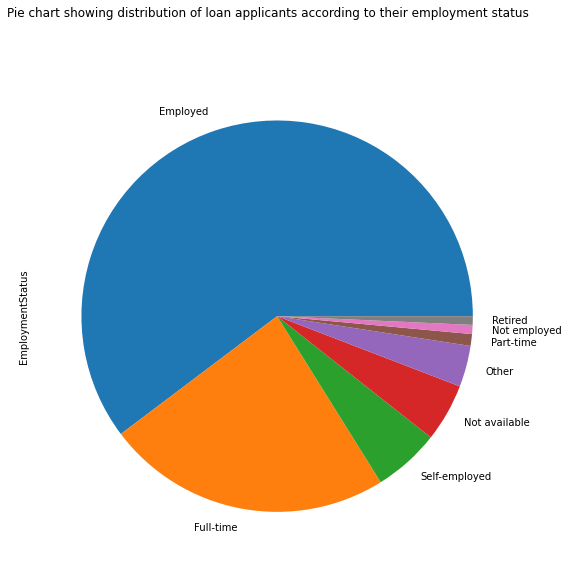

In [4]:
#code to plot the pie chart
plt.figure(figsize=[10,9])
df_loan['EmploymentStatus'].value_counts().plot.pie()
plt.suptitle('Pie chart showing distribution of loan applicants according to their employment status');

## The month that had the highest number of loan applicants

From the plot it can clearly be seen that January has most number of loan applicants, it seems that most people borrow money at the start of the year

In [5]:
#code to get months from the date column using string indexing techniques
month = df_loan.LoanOriginationDate.str[5:7]
month

0         09
1         03
2         01
3         11
4         09
          ..
113932    04
113933    11
113934    12
113935    11
113936    01
Name: LoanOriginationDate, Length: 113937, dtype: object

In [6]:
#code to get months from the date column using string indexing techniques
month = df_loan.LoanOriginationDate.str[5:7]
month = month.replace({'01':'January','02':'February','03':'March',
                  '04':'April','05':'May','06':'June',
                  '07':'July','08':'August','09':'September',
                  '10':'October','11':'November','12':'December'
                })

In [7]:
#combining the series month with the dataframe df_loan
d1 = df_loan.merge(month, left_index=True, right_index=True)
d1.head(2)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors,LoanOriginationDate_y
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.158,0.138,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258,September
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.092,0.082,...,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1,March


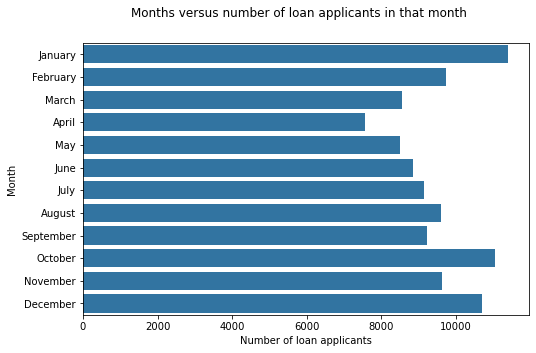

In [8]:
#code to plot the horizontal bar chart
plt.figure(figsize=[8,5])
color = sb.color_palette()[0]
sb.countplot(data = d1, y = 'LoanOriginationDate_y',color = color,order = ['January','February','March','April','May','June','July', 
                                                              'August','September','October','November',
                                                              'December'])
xl_yl_t('Number of loan applicants','Month','Months versus number of loan applicants in that month');

## Original loan amount vs Employment status and income range

From the two visualizations, it is safe to say that The employed people generally apply for greater amounts of loan and also the people with the highest income range ($100,000+) applied for the highest amounts of loans

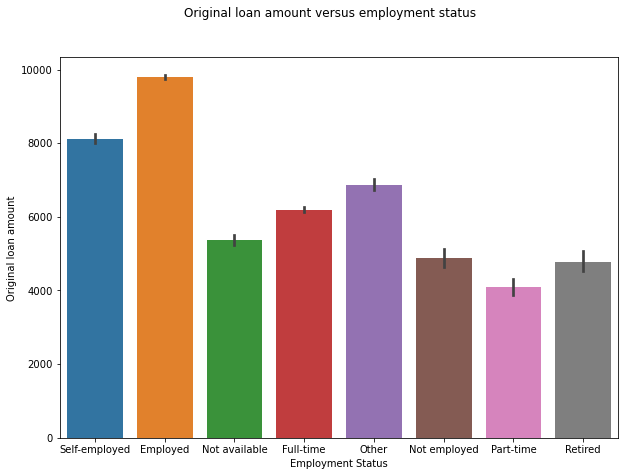

In [9]:
#This is a plot for loan amounts spread across various employment statuses
plt.figure(figsize=[10,7])
sb.barplot(y='LoanOriginalAmount', x='EmploymentStatus',  data=df_loan)
xl_yl_t('Employment Status','Original loan amount','Original loan amount versus employment status')

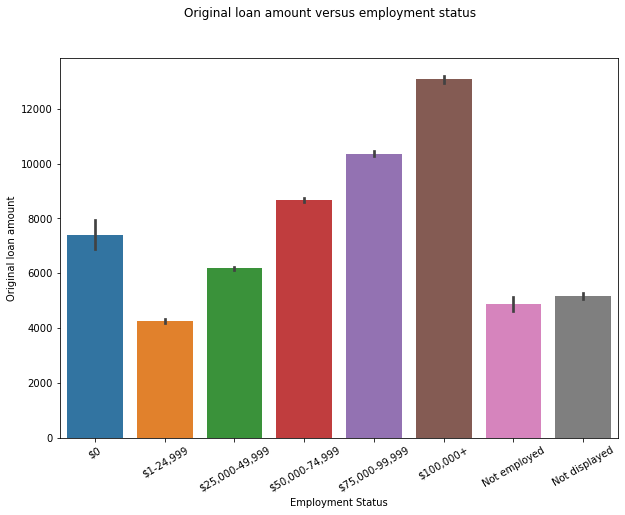

In [10]:
#This is a plot for loan amounts spread across various income ranges
plt.figure(figsize=[10,7])
sb.barplot(y='LoanOriginalAmount', x='IncomeRange', order =["$0" ,"$1-24,999", "$25,000-49,999", "$50,000-74,999", "$75,000-99,999", "$100,000+","Not employed","Not displayed"], data=df_loan)

xl_yl_t('Employment Status','Original loan amount','Original loan amount versus employment status')
plt.xticks(rotation=30, horizontalalignment="center");

## Relationship between employment status and the loan origination date

From the heatmap, we can see that Employed people generlly apply for loans throughout the year and does not affect their loan application activities

In [11]:
d1 = df_loan.merge(month, left_index=True, right_index=True)


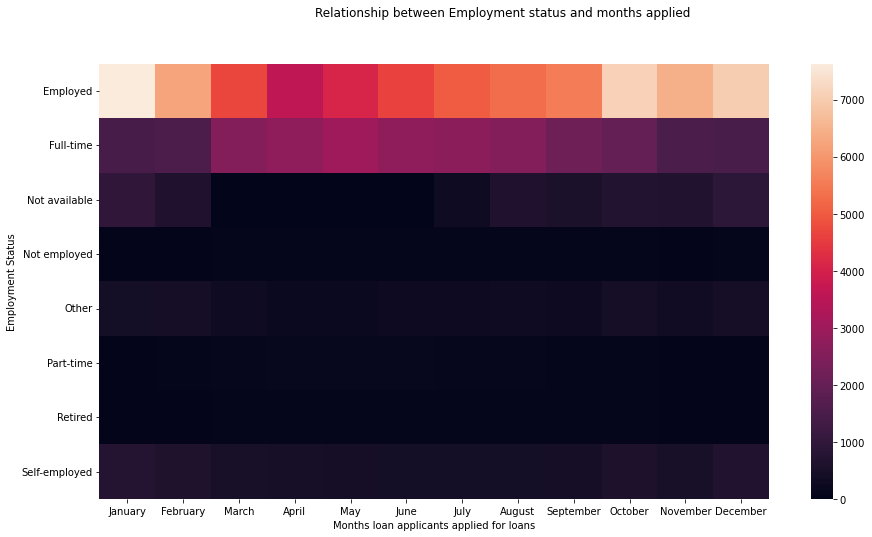

In [12]:
d1['LoanOriginationDate_y'] = pd.Categorical(d1['LoanOriginationDate_y'], categories=['January','February','March','April','May','June','July','August','September','October','November','December'])
d1 = d1.sort_values('LoanOriginationDate_y')
d1.apply(lambda x: x.factorize()[0]).corr()
plt.figure(figsize=[15,8])
sb.heatmap(pd.crosstab(d1.EmploymentStatus ,d1.LoanOriginationDate_y))
xl_yl_t('Months loan applicants applied for loans','Employment Status','Relationship between Employment status and months applied ')


## Distribution of the loan amounts in various states across loan applicants of different employment statuses

From the visualization we can clearly see that generally across most states,the employed loan applicants apply for the largest number of loans than any other employment status category.

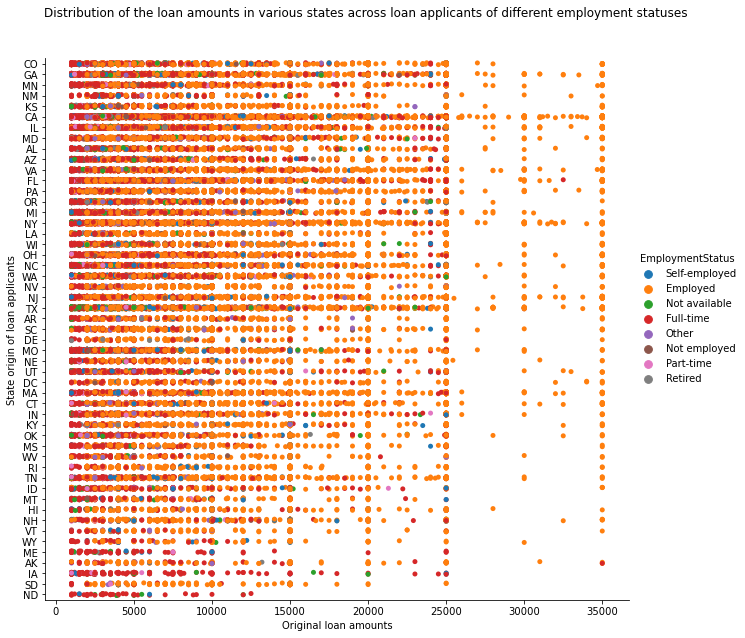

In [13]:
sb.catplot(x = 'LoanOriginalAmount', y = 'BorrowerState', hue = 'EmploymentStatus', data = df_loan,height=9);
xl_yl_t('Original loan amounts','State origin of loan applicants','Distribution of the loan amounts in various states across loan applicants of different employment statuses')
plt.subplots_adjust(top=0.90)

In [ ]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt 